In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.shape

(891, 12)

In [ ]:
test_df.shape

(418, 11)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.drop(columns=["Name","PassengerId","Cabin","Ticket"],inplace=True)
test_df.drop(columns=["Name","PassengerId","Cabin","Ticket"],inplace=True)

In [ ]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
test_df.isnull().mean()

Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Embarked    0.000000
dtype: float64

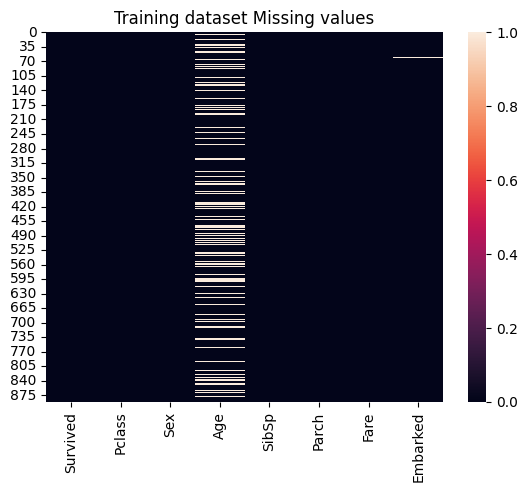

In [ ]:
plt.title("Training dataset Missing values")
sns.heatmap(train_df.isnull())
plt.show()

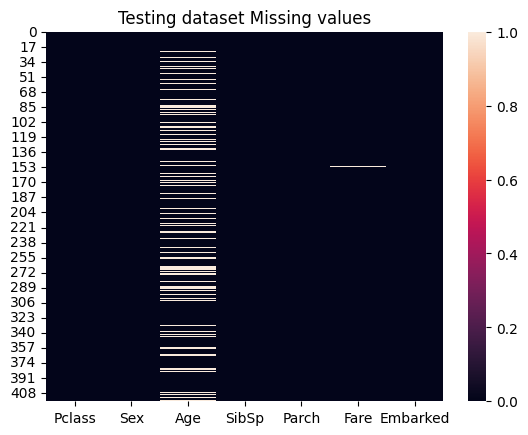

In [ ]:
plt.title("Testing dataset Missing values")
sns.heatmap(test_df.isnull())
plt.show()

In [ ]:
train_df.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [ ]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_df["Embarked"].fillna("S",inplace=True)

In [ ]:
test_df[test_df["Fare"].isnull() == True].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [ ]:
test_df["Fare"].fillna(test_df["Fare"][test_df["Pclass"] == 3].mean(),inplace=True)

In [ ]:
train_df.drop(columns=["Age"],inplace=True)
test_df.drop(columns=["Age"],inplace=True)

In [ ]:
train_df["Sex"] = train_df["Sex"].map({"male":1,"female":2})
test_df["Sex"] = test_df["Sex"].map({"male":1,"female":2})
train_df["Embarked"] = train_df["Embarked"].map({"S":1,"C":2,"Q":3})
test_df["Embarked"] = test_df["Embarked"].map({"S":1,"C":2,"Q":3})

In [ ]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,1
1,1,1,2,1,0,71.2833,2
2,1,3,2,0,0,7.9250,1
3,1,1,2,1,0,53.1000,1
4,0,3,1,0,0,8.0500,1


In [ ]:
test_df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,0,0,7.8292,3
1,3,2,1,0,7.0000,1
2,2,1,0,0,9.6875,3
3,3,1,0,0,8.6625,1
4,3,2,1,1,12.2875,1


<Axes: >

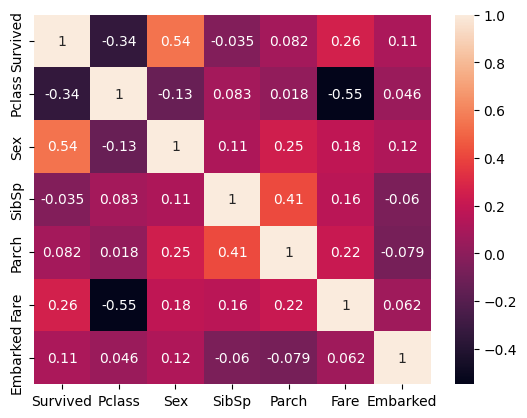

In [ ]:
sns.heatmap(train_df.corr(),annot=True)

In [ ]:
X_train = train_df.drop(columns="Survived")
Y_train = train_df["Survived"]
X_test = test_df
Y_test = pd.read_csv("gender_submission.csv")["Survived"]

In [ ]:
Y_test = pd.read_csv("gender_submission.csv")["Survived"]
Y_test

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
X_train.shape,X_test.shape

((891, 6), (418, 6))

In [ ]:
Y_train.shape,Y_test.shape

((891,), (418,))

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(Y_test,y_pred))

0.9784688995215312
Confusion matrix:  [[261   5]
 [  4 148]]
